## Importing different Libraries 

In [1]:
import random 
random.seed(123)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#### Checking top five rows of the dataset

In [2]:
df=pd.read_excel("electricity data for data analysis.xlsx")
df.head()

,Date,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,2020-01-08 00:00:00,1,4,7,2475.68,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524
1,2020-01-08 01:00:00,2,4,7,2484.40,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393
2,2020-01-08 02:00:00,3,4,7,2486.89,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833
3,2020-01-08 03:00:00,4,4,7,2533.42,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119
4,2020-01-08 04:00:00,5,4,7,2850.75,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119


## Data Preprossing 

In [3]:
df['Date_'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [4]:
df = df.reindex(['Date_', 'Time','Weekday','Is Working Day','SDSH Price','SDSH DAP','SDSH Volume','Sgn0 VolumeDir','P24HA Price','PDSH Price','PWA Price'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_           7584 non-null   object 
 1   Time            7584 non-null   object 
 2   Weekday         7584 non-null   int64  
 3   Is Working Day  7584 non-null   int64  
 4   SDSH Price      7584 non-null   float64
 5   SDSH DAP        7584 non-null   float64
 6   SDSH Volume     7584 non-null   float64
 7   Sgn0 VolumeDir  7584 non-null   float64
 8   P24HA Price     7584 non-null   float64
 9   PDSH Price      7584 non-null   float64
 10  PWA Price       7584 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 651.9+ KB


#### There is no missing data in the dataset

In [6]:
df.isnull().sum()

Date_             0
Time              0
Weekday           0
Is Working Day    0
SDSH Price        0
SDSH DAP          0
SDSH Volume       0
Sgn0 VolumeDir    0
P24HA Price       0
PDSH Price        0
PWA Price         0
dtype: int64

In [7]:
df.columns

Index(['Date_', 'Time', 'Weekday', 'Is Working Day', 'SDSH Price', 'SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWA Price'],
      dtype='object')

## Visualization of Dataset

<AxesSubplot:ylabel='Frequency'>

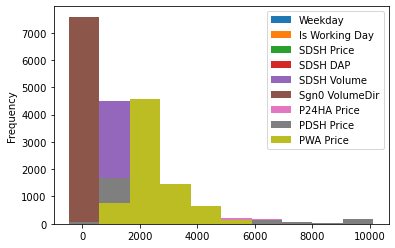

In [8]:
df.plot.hist()

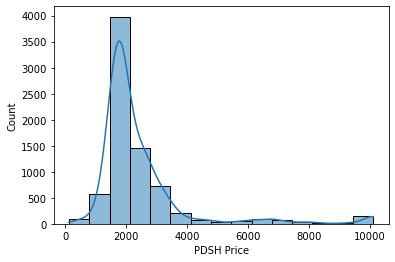

In [9]:
sns.histplot(data=df, x='PDSH Price', bins=15, kde=True)
plt.show()

<AxesSubplot:>

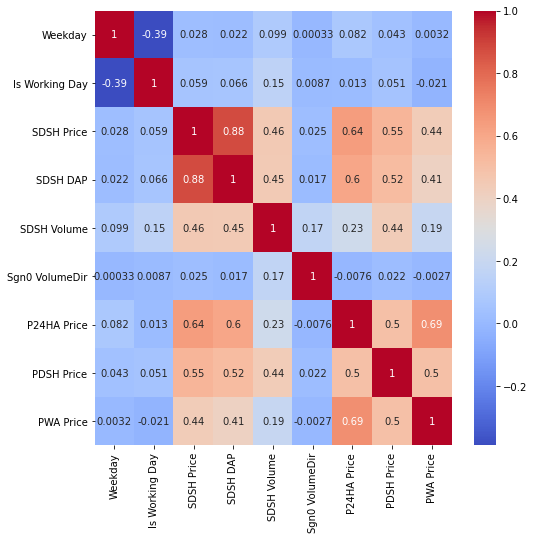

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Heatmap is given below representing the co_relation between features, Higer the value means strongly co-related features and vice versa

In [ ]:
corr = np.corrcoef(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

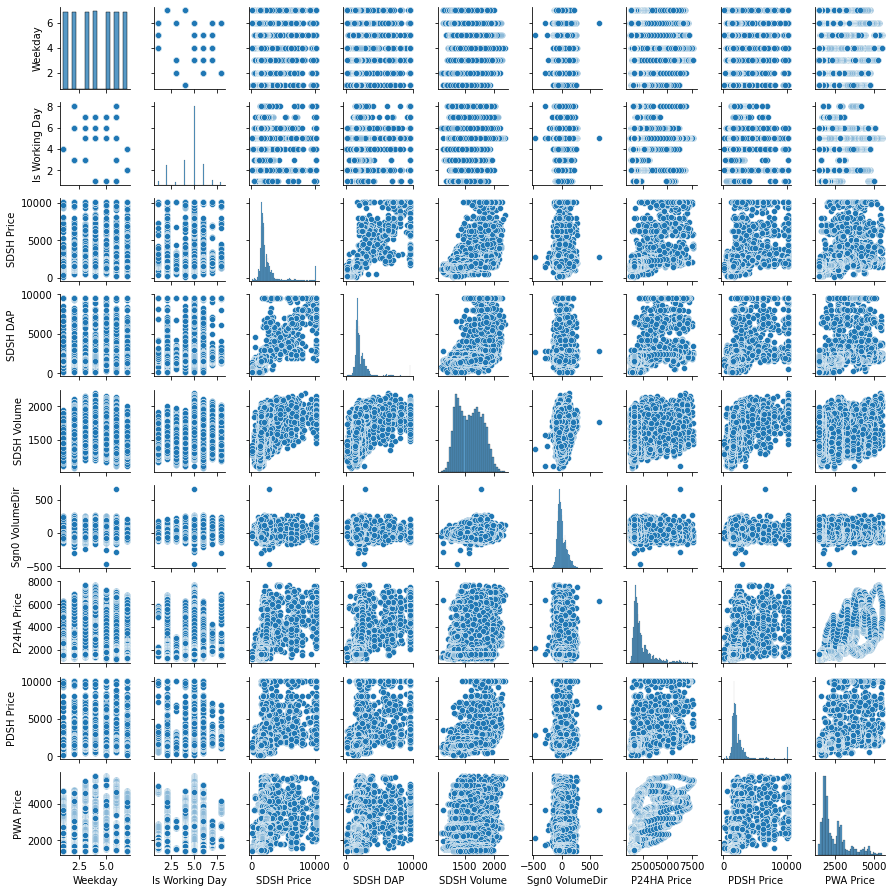

In [11]:
sns.pairplot(df,height=1.4)

#### The above given graph is pairplot graph representing relationship between each feature.

## Bivariate Analysis

#### In all the graphs given below  correlation exists between these features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SDSH Volume', ylabel='SDSH DAP'>

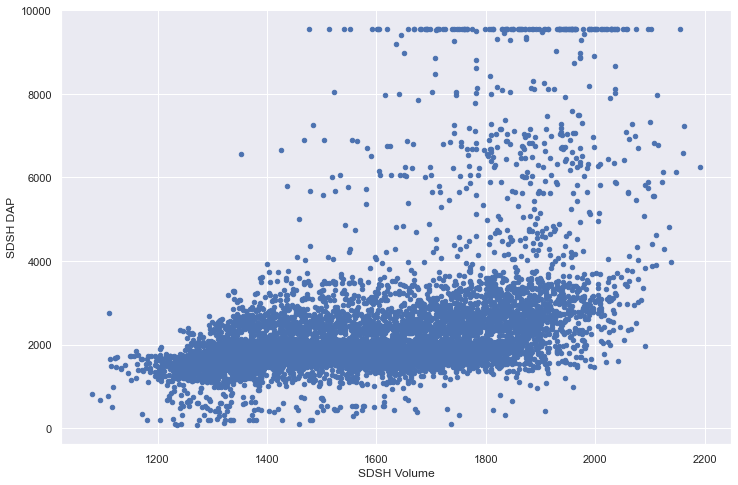

In [34]:
df.plot.scatter('SDSH Volume','SDSH DAP')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PDSH Price', ylabel='PWA Price'>

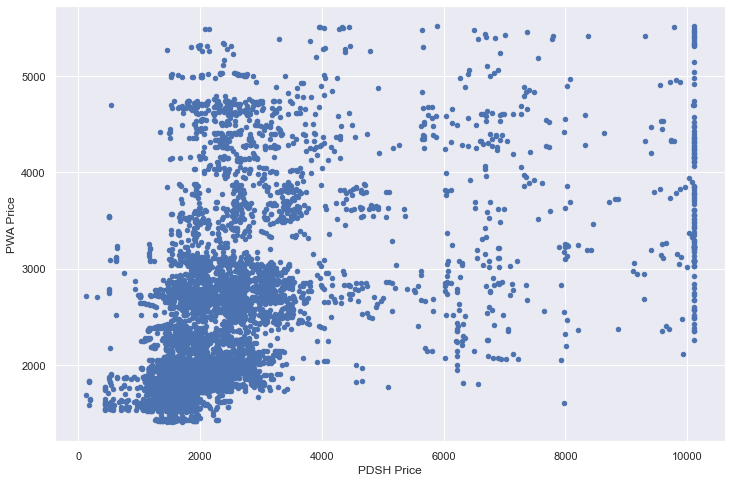

In [35]:
df.plot.scatter('PDSH Price','PWA Price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PDSH Price', ylabel='P24HA Price'>

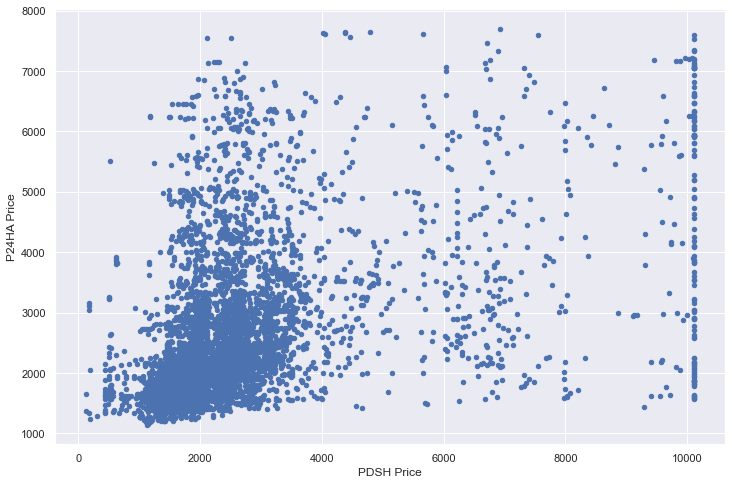

In [36]:
df.plot.scatter('PDSH Price','P24HA Price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SDSH Price', ylabel='SDSH DAP'>

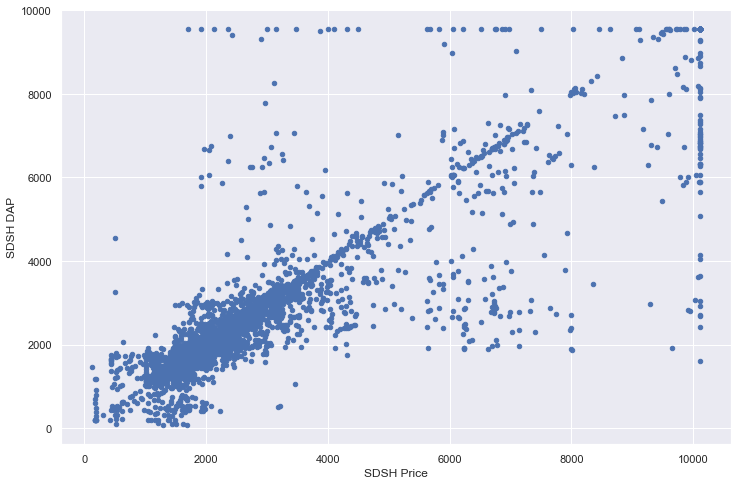

In [37]:
df.plot.scatter('SDSH Price','SDSH DAP')

## Prediction Of Electricity Price and Load

In [38]:
lbl = preprocessing.LabelEncoder()
df['Date_'] = lbl.fit_transform(df['Date_'].astype(str))
df['Time'] = lbl.fit_transform(df['Time'].astype(str))


df['Weekday'] = lbl.fit_transform(df['Weekday'].astype(float))
df['Is Working Day'] = lbl.fit_transform(df['Is Working Day'].astype(float))
df['SDSH Price'] = lbl.fit_transform(df['SDSH Price'].astype(float))
df['SDSH DAP'] = lbl.fit_transform(df['SDSH DAP'].astype(float))
df['SDSH Volume'] = lbl.fit_transform(df['SDSH Volume'].astype(float))
df['Sgn0 VolumeDir'] = lbl.fit_transform(df['Sgn0 VolumeDir'].astype(float))
df['P24HA Price'] = lbl.fit_transform(df['P24HA Price'].astype(float))
df['PDSH Price'] = lbl.fit_transform(df['PDSH Price'].astype(float))
df['PWA Price'] = lbl.fit_transform(df['PWA Price'].astype(float))

'Weekday', 'Is Working Day', 'SDSH Price', 'SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWA Price'

In [39]:
X=df.drop('PDSH Price',axis=1)
y=df['PDSH Price']

In [40]:
y.head()

0    2473.00
1    2459.38
2    2370.61
3    2021.43
4    2176.48
Name: PDSH Price, dtype: float64

#### Dividing a dataset into two part one for Training (70%) and other for Testing (30%)

In [41]:
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=seed)

### Implemantation of different Algorithms

In [17]:
from sklearn.svm import SVR
reg=SVR()
reg.fit(X_train, y_train)
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Variance score: 0.07144521657419334


In [18]:
from xgboost import XGBRegressor
import xgboost as xgb

In [19]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

output = reg.predict(X_test)

In [20]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.7171711843660571


In [21]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(X_train, y_train)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.41220592042531234


reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

output = reg.predict(X_test)

In [22]:
reg = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data
reg.fit(X, y)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 1.0
